In [1]:
%pylab --n
%matplotlib inline
import seaborn as sns
import sys
from os.path import join, isdir
import birdsonganalysis as bsa

sns.set_palette('colorblind')
sys.path.append('../model')

from measures import bsa_measure
from scipy.io import wavfile
import pandas as pd
import pickle
from glob import iglob

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [68]:
def _running_mean(x, N):
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

In [7]:

sr, tutor = wavfile.read('../data/ba_example.wav')
sr, basynth = wavfile.read('../data/ba_example_out.wav')

In [69]:
tm = bsa_measure(tutor, sr)
bam = bsa_measure(basynth, sr)
amp = bsa.song_amplitude(basynth, 256, 40, 1024)
sort_amp = np.sort(amp)
sort_amp = sort_amp[len(sort_amp)//10:]  # discard too low values
i_max_diff = np.argmax(_running_mean(np.diff(sort_amp), 100))
threshold = sort_amp[i_max_diff]
bacomp = np.linalg.norm(tm[amp > threshold] - bam[amp > threshold], axis=0)

fnames = ['fm', 'am', 'entropy', 'goodness', 'amplitude', 'pitch']

bacomp = {fname: bacomp[i] for i, fname in enumerate(fnames)}
bacomp['cond'] = 'basynth'

In [70]:
rpath = "../model/res/super_concurrent_170419_152612/"
score = []
for path in iglob(join(rpath, '*')):
    if not isdir(path):
        continue
    with open(join(path, 'data_cur.pkl'), 'rb') as f:
        data = pickle.load(f)
    root_data = [item[1] for item in data if item[0] == 'root']
    rd = pd.DataFrame(root_data)
    song = rd.iloc[-1]['songs'][0]
    csong = song.gen_sound()
    sam = bsa_measure(csong, sr)
    
    amp = bsa.song_amplitude(csong, 256, 40, 1024)
    sort_amp = np.sort(amp)
    sort_amp = sort_amp[len(sort_amp)//10:]  # discard too low values
    i_max_diff = np.argmax(_running_mean(np.diff(sort_amp), 100))
    threshold = sort_amp[i_max_diff]
    scomp = np.linalg.norm(sam[amp > threshold] - tm[amp > threshold], axis=0)
    fnames = ['fm', 'am', 'entropy', 'goodness', 'amplitude', 'pitch']
    scomp = {fname: scomp[i] for i, fname in enumerate(fnames)}
    scomp['cond'] = 'learn'
    score.append(scomp)

In [71]:
score.append(bacomp)

In [72]:
perfect = {fname: 0 for i, fname in enumerate(fnames)}
perfect['cond'] = 'perfect'
score.append(perfect)

In [73]:
scores = pd.DataFrame(score)

In [74]:
scores

,am,amplitude,cond,entropy,fm,goodness,pitch
0,80.939737,88.618424,learn,96.036935,60.375296,198.539048,129.059324
1,81.612416,73.658672,learn,57.867361,55.027145,95.275914,108.878752
2,97.398257,73.961626,learn,86.255112,19.074468,52.490282,59.727628
3,88.916378,81.227550,learn,71.676959,56.334584,93.217410,118.555721
4,61.523012,42.111254,learn,45.627700,42.792555,132.439845,61.526338
5,96.271173,82.847938,learn,92.177748,47.320801,139.636086,77.492045
6,66.283764,49.401880,learn,57.854739,32.666107,110.009102,73.309552
7,120.543304,87.810130,learn,103.648696,61.067284,166.373073,106.259830
8,92.084357,56.687352,learn,74.668870,48.128250,162.843891,98.432881
9,151.066208,110.328725,learn,109.731527,58.616734,93.876316,119.914173


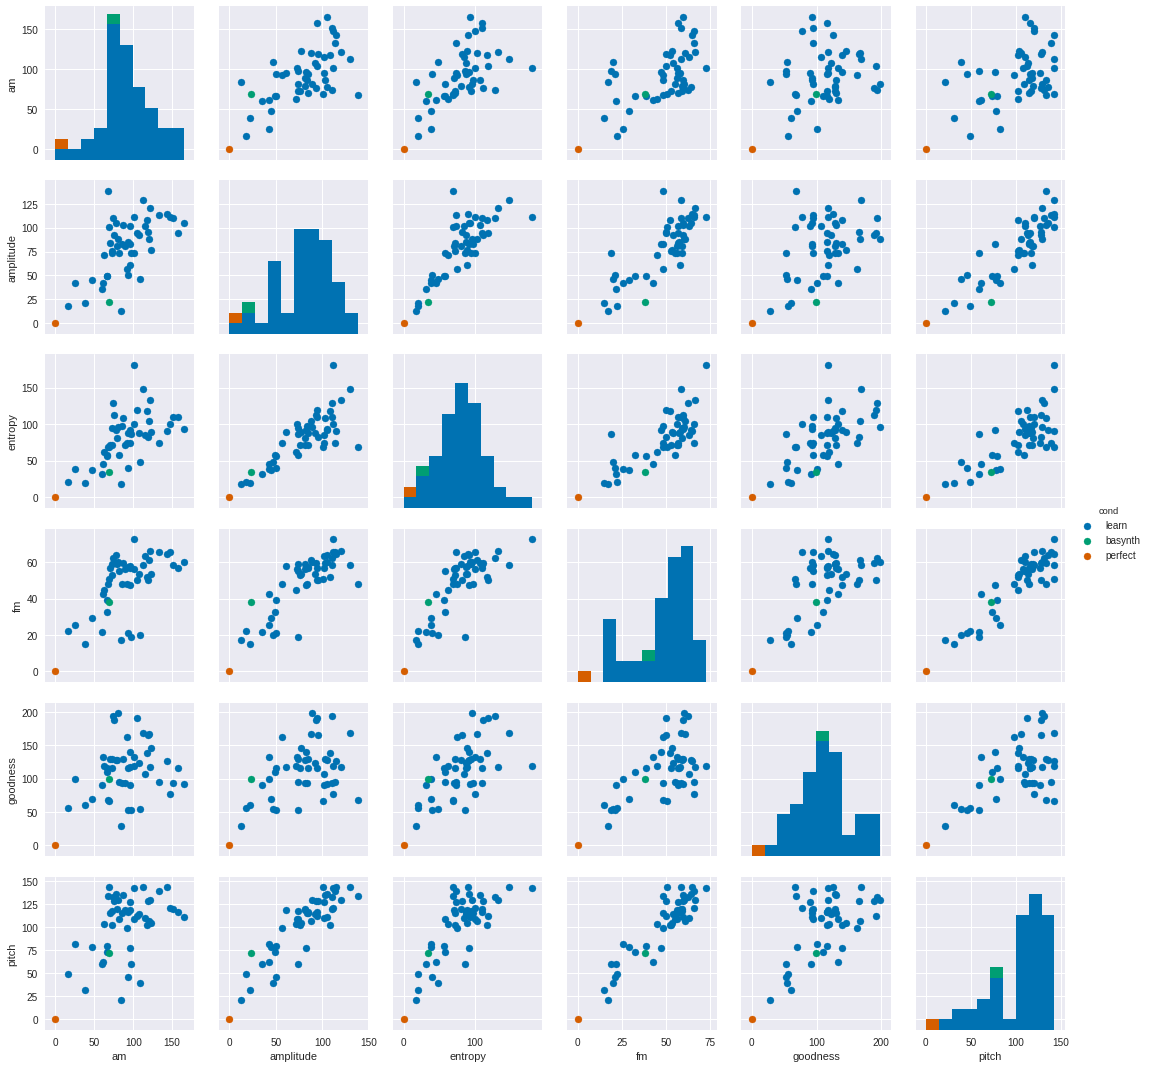

In [79]:
g = sns.PairGrid(scores, hue="cond")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

We can clearly see that for now, BA synth is better for amplitude and entropy. Which surprises me because I expected that FM or goodness will make the difference as the direction of the signal is often wrong.